### Health Insurance Quote

Use simple supervised machine learning model (ex: Linear Regression) to predict induvial members health insurance quote.

#### Data Description

#### INI File Configuration

In [4]:
from configparser import ConfigParser
config = ConfigParser()
config.read('F:/AI/InsurancePremium/ML/INI/config.ini')
vAR_File_Path = config.get('PATH', 'DATA_FILE_PATH')

#### Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

#### Load Data

In [5]:
data = pd.read_csv(vAR_File_Path)
df = data.copy()

C:\Users\Aparna\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Aparna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Aparna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] File data/health_insurance.csv does not exist: 'data/health_insurance.csv'

#### The Data

In [4]:
df.head()

,age,sex,bmi,income,pre-medical status,cur-medical status,smoker,hobbies,dependents,region,premium
0,19,female,27.900,140541,yes,1,yes,sleeping,0,southwest,16884.92400
1,18,male,33.770,23913,no,1,no,reading,1,southeast,1725.55230
2,28,male,33.000,23338,no,1,no,board-games,3,southeast,4449.46200
3,33,male,22.705,155834,yes,1,no,board-games,0,northwest,21984.47061
4,32,male,28.880,24835,no,1,no,board-games,0,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,income,cur-medical status,dependents,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,80971.102392,0.630045,1.094918,13270.422265
std,14.049960,6.098187,50156.645448,0.482973,1.205493,12110.011237
min,18.000000,15.960000,20002.000000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,41164.250000,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,65083.000000,1.000000,1.000000,9382.033000
75%,51.000000,34.693750,111275.250000,1.000000,2.000000,16639.912515
max,64.000000,53.130000,199996.000000,1.000000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1338 non-null   int64  
 1   sex                 1338 non-null   object 
 2   bmi                 1338 non-null   float64
 3   income              1338 non-null   int64  
 4   pre-medical status  1338 non-null   object 
 5   cur-medical status  1338 non-null   int64  
 6   smoker              1338 non-null   object 
 7   hobbies             1338 non-null   object 
 8   dependents          1338 non-null   int64  
 9   region              1338 non-null   object 
 10  premium             1338 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 115.1+ KB


In [7]:
df.shape

(1338, 11)

In [8]:
df.dtypes

age                     int64
sex                    object
bmi                   float64
income                  int64
pre-medical status     object
cur-medical status      int64
smoker                 object
hobbies                object
dependents              int64
region                 object
premium               float64
dtype: object

In [9]:
df.isna().sum()

age                   0
sex                   0
bmi                   0
income                0
pre-medical status    0
cur-medical status    0
smoker                0
hobbies               0
dependents            0
region                0
premium               0
dtype: int64

#### Exploratory Data Analysis

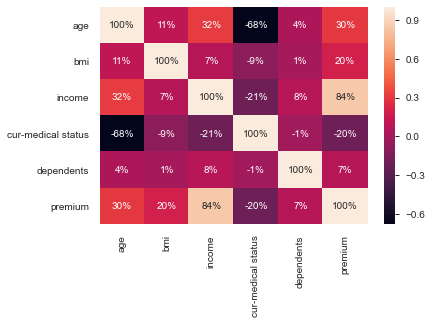

In [82]:
sns.heatmap(df.corr(),annot=True,fmt='.0%')

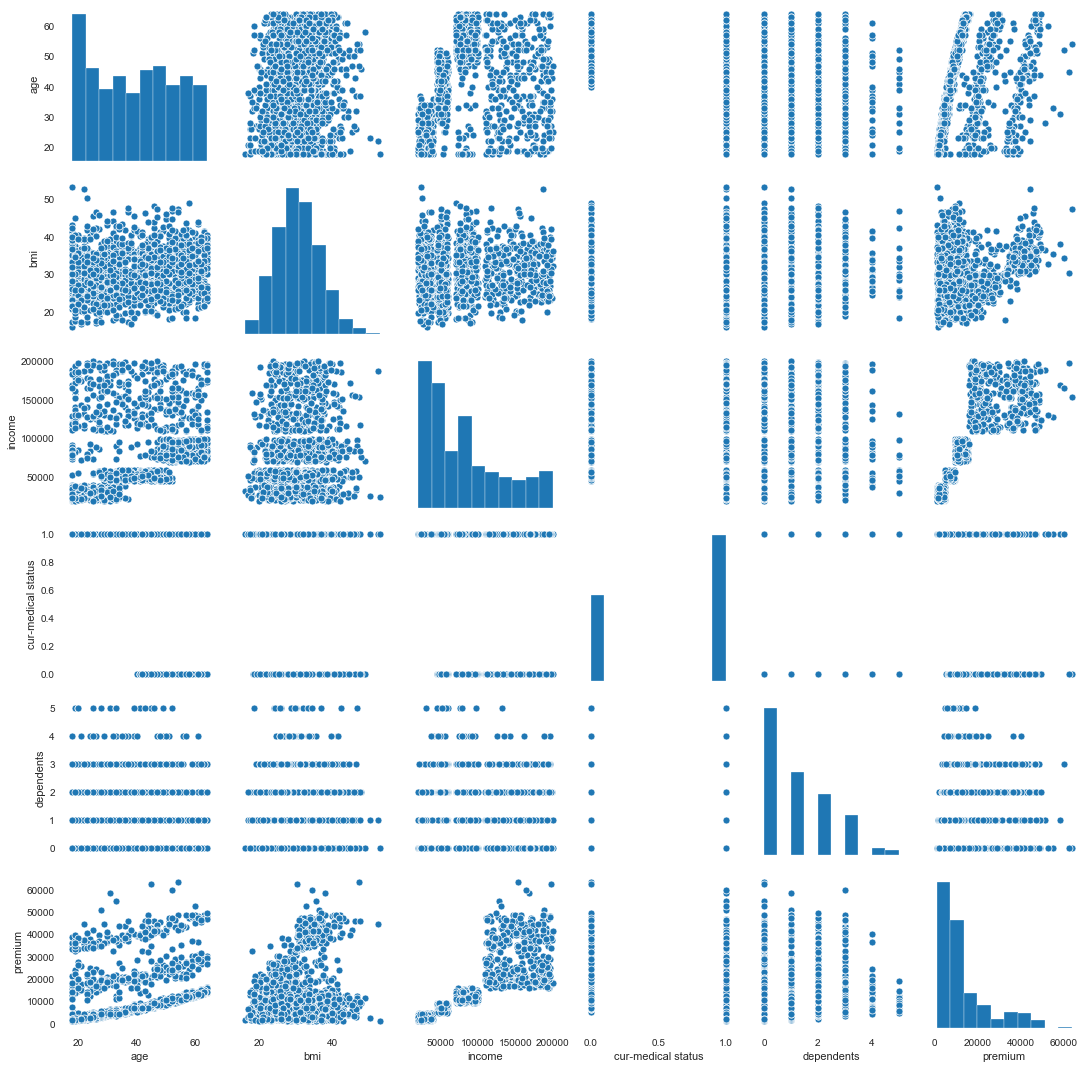

In [83]:
sns.pairplot(df)

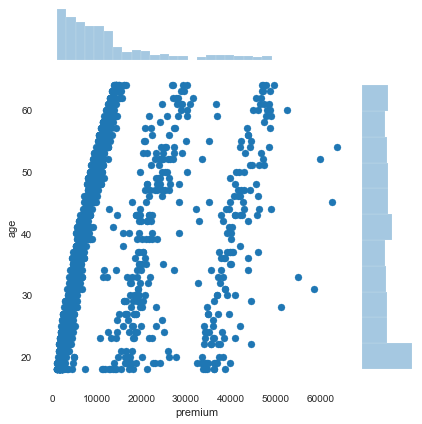

In [12]:
sns.jointplot(x='premium',y='age',data=df)

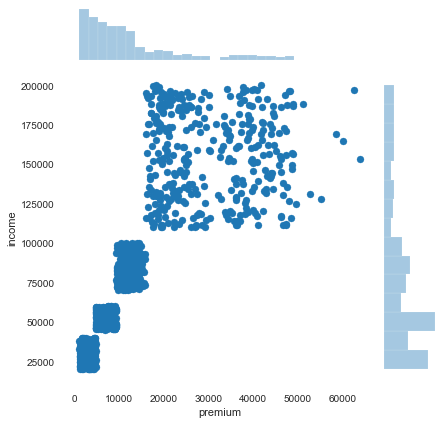

In [13]:
sns.jointplot(x='premium',y='income',data=df)

In [13]:
df.nunique()

age                     47
sex                      2
bmi                    548
income                1329
pre-medical status       2
cur-medical status       2
smoker                   2
hobbies                 21
dependents               6
region                   4
premium               1337
dtype: int64

In [14]:
df["hobbies"].value_counts()

reading           87
bungie-jumping    79
kayaking          77
golf              76
yachting          75
exercise          75
camping           72
paintball         72
movies            71
hiking            71
base-jumping      67
video-games       67
board-games       66
skydiving         64
polo              60
dancing           57
chess             55
sleeping          51
basketball        49
cross-fit         46
hobbies            1
Name: hobbies, dtype: int64

In [51]:
df.duplicated().sum()

0

#### Deal Categorical Features

In [14]:
ad_sports = ["bungie-jumping", "kayaking", "yachting", "camping","hiking", "base-jumping", "skydiving","polo","camping","hiking"]
games = ["video-games", "board-games", "chess", "basketball", "cross-fit", "paintball", "golf"]
routine = ["reading", "movies", "dancing", "sleeping","hobbies", "exercise"]

def hobby(row):
    if row in ad_sports:
        return "ad_sports"
    elif row in games:
        return "games"
    else:
        return "routine"
df["hobbies"] = df["hobbies"].apply(hobby)

In [15]:
df.head()

,age,sex,bmi,income,pre-medical status,cur-medical status,smoker,hobbies,dependents,region,premium
0,19,female,27.900,140541,yes,1,yes,routine,0,southwest,16884.92400
1,18,male,33.770,23913,no,1,no,routine,1,southeast,1725.55230
2,28,male,33.000,23338,no,1,no,games,3,southeast,4449.46200
3,33,male,22.705,155834,yes,1,no,games,0,northwest,21984.47061
4,32,male,28.880,24835,no,1,no,games,0,northwest,3866.85520


#### Encoding

In [16]:
df.replace({"sex":{"male":0, "female":1}, "pre-medical status":{"no":0,"yes":1}, "smoker":{"no":0,"yes":1}},inplace =True)

df = pd.get_dummies(df,columns=["hobbies", "region"],drop_first=True)

df.head()

,age,sex,bmi,income,pre-medical status,cur-medical status,smoker,dependents,premium,hobbies_games,hobbies_routine,region_northwest,region_southeast,region_southwest
0,19,1,27.900,140541,1,1,1,0,16884.92400,0,1,0,0,1
1,18,0,33.770,23913,0,1,0,1,1725.55230,0,1,0,1,0
2,28,0,33.000,23338,0,1,0,3,4449.46200,1,0,0,1,0
3,33,0,22.705,155834,1,1,0,0,21984.47061,1,0,1,0,0
4,32,0,28.880,24835,0,1,0,0,3866.85520,1,0,1,0,0


#### Scaling

In [17]:
sc = StandardScaler()
X = sc.fit_transform(df.drop("premium", axis = 1))
y = df["premium"]

#### Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#### Modellig

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
print(f"Coef: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

Coef: [1689.45605076 -150.66078476 1903.18131709 5598.20015763 -219.77630344
   79.38828176 5395.08335128  246.9105997  -399.95110005 -351.41016986
  148.68373771 -145.16346569  -64.21424903]
Intercept: 13209.545651400495


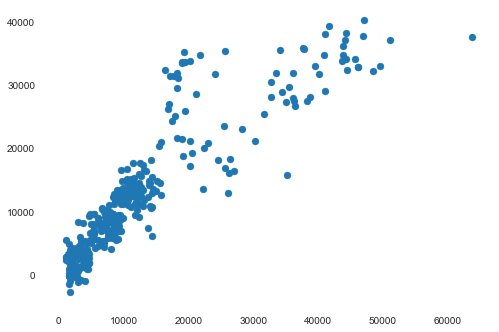

In [23]:
test_pred = lr.predict(X_test)
plt.scatter(y_test, test_pred)

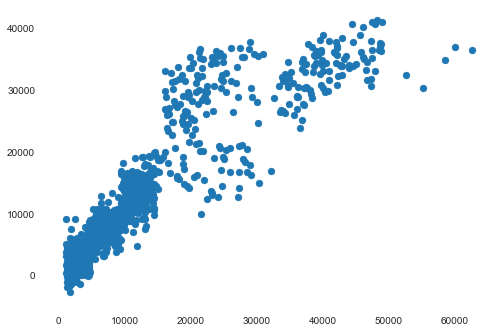

In [24]:
train_pred = lr.predict(X_train)
plt.scatter(y_train, train_pred)

#### Results

In [31]:
test_score = r2_score(y_test, test_pred)
train_score = r2_score(y_train, train_pred)
mae = metrics.mean_absolute_error(y_test, test_pred)
mse = metrics.mean_squared_error(y_test, test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))

In [28]:
print(f" R2 for training data prediction: {train_score}")
print(f" R2 for test data prediction: {test_score}")

 R2 for training data prediction: 0.822113800328699
 R2 for test data prediction: 0.8052633637900364


In [32]:
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 3553.1093967077863
MSE: 27707640.328430302
RMSE: 5263.80473882061


In [37]:
# lr.get_params()

In [43]:
with open("Output.txt","w") as file:
    for out in [f"Coefficient : {lr.coef_} \n", f"Intercept : {lr.intercept_} \n", f"MAE : {mae} \n", f"MSE : {mse} \n",\
                f"RMSE : {rmse} \n"]:
        file.writelines(out) 
    